In [1]:
import dreye
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get dummy LED measurements and a photoreceptor model

In [2]:
wls = np.arange(300, 651)

In [3]:
np.random.seed(10)
peaks = np.linspace(350, 580, 4)
leds = dreye.create_gaussian_spectrum(
    wls, 
    peaks, 
    np.array([7, 10, 18, 25])
)

In [4]:
intensity_bounds=(
    np.zeros(peaks.size), 
    np.array([10, 12, 17, 22])
)
measured_spectra = dreye.get_led_spectra_container(
    leds,
    names=['uv', 'blue', 'green', 'amber'], 
    intensity_bounds=intensity_bounds, 
    output_bounds=(0, 5)
)

## Spectra of LEDs used for fitting

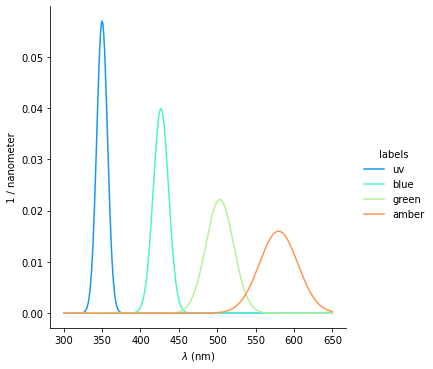

In [5]:
measured_spectra.normalized_spectra.plot(palette='rainbow')

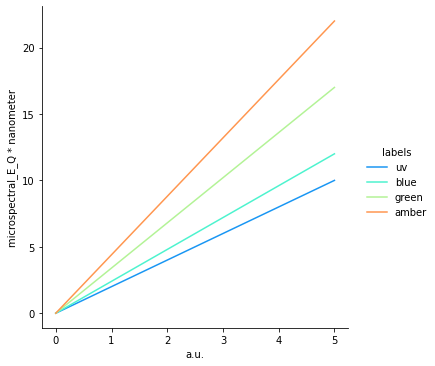

In [6]:
measured_spectra.intensities.plot(palette='rainbow')

In [7]:
# intensity range of LEDs
measured_spectra.intensity_bounds

(array([0., 0., 0., 0.]), array([10., 12., 17., 22.]))

## Trichromatic linear photoreceptor model

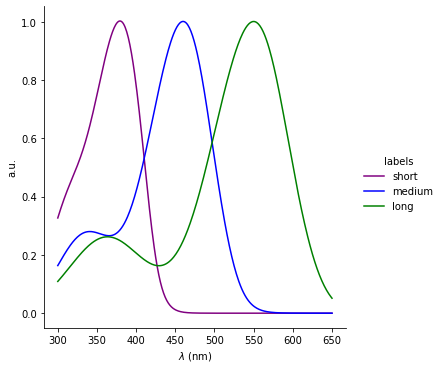

In [8]:
cmap = {'short': 'purple', 'medium': 'blue', 'long': 'green'}

sensitivity = dreye.Sensitivity(
    np.array([380, 460, 550]), 
    wls, 
    from_template=True, 
    labels=list(cmap), 
    name='opsins'
)
sensitivity.plot(palette=cmap)

photoreceptor_model = dreye.LinearPhotoreceptor(sensitivity)

In [16]:
model = dreye.BestSubstitutionFit(
    photoreceptor_model=photoreceptor_model, 
    measured_spectra=measured_spectra, 
    bg_ints=np.array([1, 2, 3, 2]),
    substitution_type='diff'
    # cp_kwargs={'verbose': True}
)

In [17]:
model.fit(np.array([1, 0, 2]))

BestSubstitutionFit(bg_ints=array([1, 2, 3, 2]),
                    measured_spectra=MeasuredSpectraContainer([[0.0 5.279935916871056e-13 1.0559871833742111e-12 ...  3.695955141809739e-12 4.2239487334968446e-12 4.75194232518395e-12] [0.0 1.4499556203760534e-12 2.899911240752107e-12 ...  1.0149689342632375e-11 1.1599644963008427e-11 1.304960058338448e-11] [0.0 3.90137426885192e-12 7.802748...36 0.007741238603976155 0.008708893429473173] [0.0 0.0008672050365120874 0.0017344100730241748 ...  0.006070435255584612 0.006937640292096699 0.0078048453286087855] [0.0 0.0007759401868838669 0.0015518803737677338 ...  0.005431581308187069 0.006207521495070935 0.0069834616819548015]] microspectral_E_Q),
                    photoreceptor_model=LinearPhotoreceptor('short', 'medium', 'long'))

### Contrast achieved

In [18]:
np.round(model.fitted_excite_X_ - model.fitted_other_excite_X_, 2)

array([[ 0.  ,  4.94,  0.  ],
       [ 7.76,  0.  , -0.  ],
       [-0.  ,  0.  ,  6.24]])

In [26]:
model.fitted_excite_X_

array([[4.2896165 , 5.58573399, 3.95114683],
       [8.16718888, 3.11448858, 3.95105638],
       [4.28947989, 3.114489  , 7.06860652]])

In [27]:
model.fitted_other_excite_X_

array([[4.2895165 , 0.64315268, 3.95104683],
       [0.41182628, 3.11438858, 3.95115638],
       [4.28957988, 3.114389  , 0.83355256]])

### LED intensity differences

In [21]:
np.round(model.fitted_intensities_ - model.fitted_other_intensities_, 4)

array([[ -3.3048,  12.    ,  17.    , -16.9488],
       [ 10.    ,   7.3894, -17.    ,  10.1072],
       [  3.2959, -12.    ,  15.5992,  22.    ]])

### Compare fit to least-squares algorithm

In [12]:
model2 = dreye.IndependentExcitationFit(
    photoreceptor_model=photoreceptor_model, 
    measured_spectra=measured_spectra, 
    bg_ints=np.array([1, 2, 3, 2]),
)

In [13]:
model2.fit(
    model.fitted_excite_X_
)

IndependentExcitationFit(bg_ints=array([1, 2, 3, 2]),
                         measured_spectra=MeasuredSpectraContainer([[0.0 5.279935916871056e-13 1.0559871833742111e-12 ...  3.695955141809739e-12 4.2239487334968446e-12 4.75194232518395e-12] [0.0 1.4499556203760534e-12 2.899911240752107e-12 ...  1.0149689342632375e-11 1.1599644963008427e-11 1.304960058338448e-11] [0.0 3.90137426885192e-12 7.8...36 0.007741238603976155 0.008708893429473173] [0.0 0.0008672050365120874 0.0017344100730241748 ...  0.006070435255584612 0.006937640292096699 0.0078048453286087855] [0.0 0.0007759401868838669 0.0015518803737677338 ...  0.005431581308187069 0.006207521495070935 0.0069834616819548015]] microspectral_E_Q),
                         photoreceptor_model=LinearPhotoreceptor('short', 'medium', 'long'))

In [14]:
np.round(model2.fitted_intensities_, 4)

array([[1.5507, 0.    , 0.    , 4.9741],
       [0.    , 0.3951, 6.0269, 0.    ],
       [0.3781, 4.2637, 0.    , 0.    ]])

In [15]:
np.round(model.fitted_intensities_, 4)

array([[1.5507, 0.    , 0.    , 4.9742],
       [0.    , 0.3952, 6.0269, 0.    ],
       [0.3781, 4.2638, 0.    , 0.    ]])